Collecting Dataset


In [2]:
import numpy as np
import pandas as pd


In [4]:
dataset=pd.read_csv('smart_home_energy_consumption_large.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [5]:
dataset.head()

NameError: name 'dataset' is not defined

In [ ]:
import matplotlib.pyplot  as plt

In [ ]:
dataset.shape

(100000, 8)

Plotting of energy consumption with appliance type

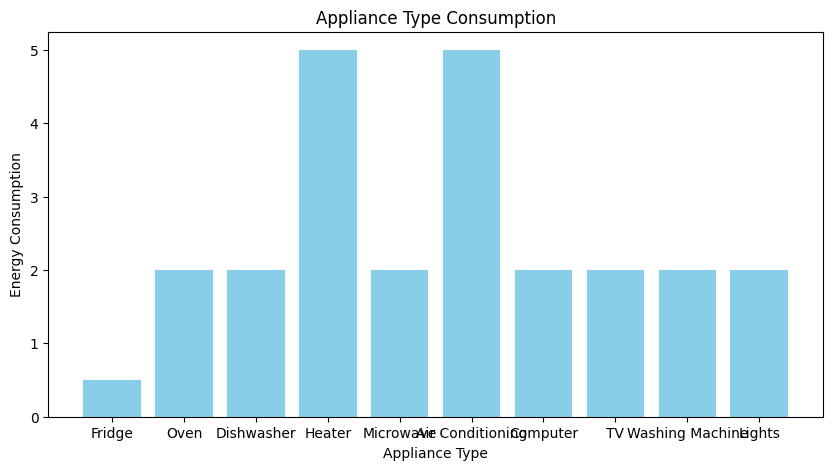

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(dataset['Appliance Type'],dataset['Energy Consumption (kWh)'],color='skyblue')
plt.xlabel("Appliance Type")
plt.ylabel("Energy Consumption")
plt.title("Appliance Type Consumption")
plt.show()

In [ ]:
dataset.dtypes

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

In [ ]:
dataset.isnull().sum()

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

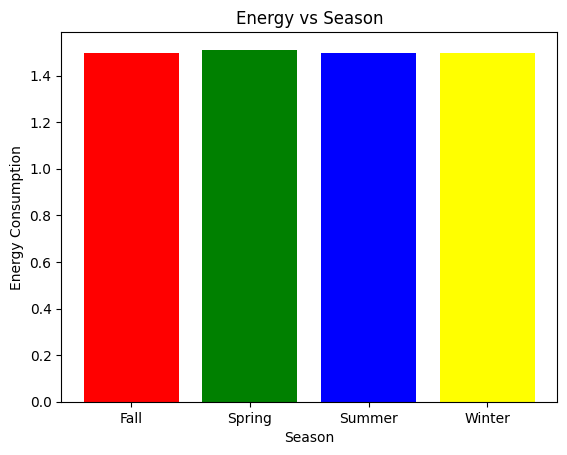

In [ ]:
valulable=dataset.groupby('Season')['Energy Consumption (kWh)'].mean()
plt.bar(valulable.index,valulable.values,color=['red','green','blue','yellow'])

plt.xlabel("Season")
plt.ylabel("Energy Consumption")
plt.title("Energy vs Season")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21016\3801005492.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Season'], y=dataset['Energy Consumption (kWh)'], palette="coolwarm")


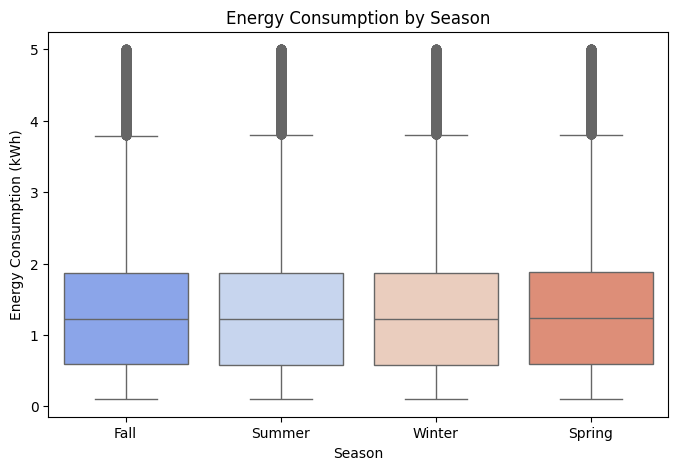

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=dataset['Season'], y=dataset['Energy Consumption (kWh)'], palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption by Season")
plt.show()

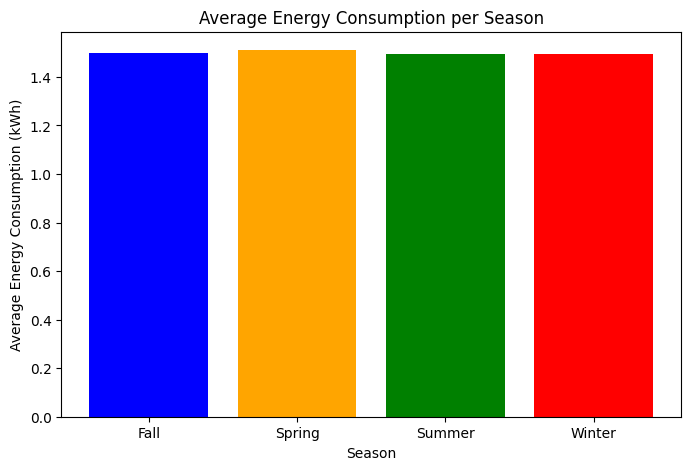

In [ ]:
import pandas as pd

seasonal_consumption = dataset.groupby('Season')['Energy Consumption (kWh)'].mean()

plt.figure(figsize=(8,5))
plt.bar(seasonal_consumption.index, seasonal_consumption.values, color=['blue','orange','green','red'])
plt.xlabel("Season")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption per Season")
plt.show()


In [ ]:
dataset.dtypes

Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fe=LabelEncoder()

In [ ]:
dataset['Appliance Type']=fe.fit_transform(dataset['Appliance Type'])

In [ ]:
dataset['Season']=le.fit_transform(dataset['Season'])

In [ ]:
dataset['Appliance Type'].value_counts()

Appliance Type
5    10201
2    10095
0    10067
4    10018
9     9953
6     9947
1     9944
7     9939
3     9931
8     9905
Name: count, dtype: int64

In [ ]:
for category,encoded_value in zip(le.classes_,range(len(le.classes_))):
    print(f"{category}->{encoded_value}")

Fall->0
Spring->1
Summer->2
Winter->3


In [ ]:
dataset

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,3,0.20,21:12,2023-12-02,-1.0,0,2
1,435,7,0.23,20:11,2023-08-06,31.1,2,5
2,466,2,0.32,06:39,2023-11-21,21.3,0,3
3,496,4,3.92,21:56,2023-01-21,-4.2,3,1
4,137,6,0.44,04:31,2023-08-26,34.5,2,5
...,...,...,...,...,...,...,...,...
99995,124,6,0.42,09:56,2023-09-28,20.5,2,1
99996,184,1,0.71,12:48,2023-05-27,-5.4,1,2
99997,101,2,0.25,05:45,2023-02-18,35.6,3,3
99998,423,0,2.69,12:39,2023-04-20,3.7,1,1


In [ ]:
for category,encoded_value in zip(fe.classes_,range(len(fe.classes_))):
    print(f"{category}:{encoded_value}")

Air Conditioning:0
Computer:1
Dishwasher:2
Fridge:3
Heater:4
Lights:5
Microwave:6
Oven:7
TV:8
Washing Machine:9


In [ ]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [ ]:
dataset['Year']=dataset['Date'].dt.year
dataset['Month']=dataset['Date'].dt.month
dataset['Day']=dataset['Date'].dt.day
dataset['Weekday']=dataset['Date'].dt.weekday
dataset['Is_Weekend']=dataset['Weekday'].apply(lambda x:  6 if x>=5 else 0)

In [ ]:
dataset

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size,Year,Month,Day,Weekday,Is_Weekend
0,94,3,0.20,21:12,2023-12-02,-1.0,0,2,2023,12,2,5,6
1,435,7,0.23,20:11,2023-08-06,31.1,2,5,2023,8,6,6,6
2,466,2,0.32,06:39,2023-11-21,21.3,0,3,2023,11,21,1,0
3,496,4,3.92,21:56,2023-01-21,-4.2,3,1,2023,1,21,5,6
4,137,6,0.44,04:31,2023-08-26,34.5,2,5,2023,8,26,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124,6,0.42,09:56,2023-09-28,20.5,2,1,2023,9,28,3,0
99996,184,1,0.71,12:48,2023-05-27,-5.4,1,2,2023,5,27,5,6
99997,101,2,0.25,05:45,2023-02-18,35.6,3,3,2023,2,18,5,6
99998,423,0,2.69,12:39,2023-04-20,3.7,1,1,2023,4,20,3,0


In [ ]:
dataset.drop('Date',axis='columns',inplace=True)

In [ ]:
dataset['Hour']=pd.to_datetime(dataset['Time'],format='%H:%M').dt.hour
dataset['Time_of_Day'] = dataset['Hour'].apply(lambda x: 
                                               'Morning' if 5<=x<12 else 
                                               'Afternoon' if 12<=x<17 else 
                                               'Evening' if 17<=x<21 else 'Night')

In [ ]:
dataset.drop('Time',axis='columns',inplace=True)

In [ ]:
dataset.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Outdoor Temperature (°C),Season,Household Size,Year,Month,Day,Weekday,Is_Weekend,Hour,Time_of_Day
0,94,3,0.20,-1.0,0,2,2023,12,2,5,6,21,Night
1,435,7,0.23,31.1,2,5,2023,8,6,6,6,20,Evening
2,466,2,0.32,21.3,0,3,2023,11,21,1,0,6,Morning
3,496,4,3.92,-4.2,3,1,2023,1,21,5,6,21,Night
4,137,6,0.44,34.5,2,5,2023,8,26,5,6,4,Night


In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
ge=LabelEncoder()
dataset['Time_of_Day']=ge.fit_transform(dataset['Time_of_Day'])

In [ ]:
dataset.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Outdoor Temperature (°C),Season,Household Size,Year,Month,Day,Weekday,Is_Weekend,Hour,Time_of_Day
0,94,3,0.20,-1.0,0,2,2023,12,2,5,6,21,3
1,435,7,0.23,31.1,2,5,2023,8,6,6,6,20,1
2,466,2,0.32,21.3,0,3,2023,11,21,1,0,6,2
3,496,4,3.92,-4.2,3,1,2023,1,21,5,6,21,3
4,137,6,0.44,34.5,2,5,2023,8,26,5,6,4,3


C:\Users\user\AppData\Local\Temp\ipykernel_21016\2664531770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset['Time_of_Day'], y=dataset['Energy Consumption (kWh)'], palette="coolwarm")


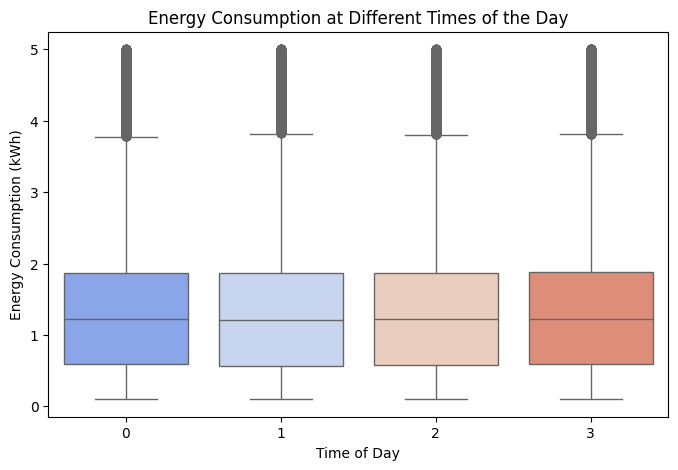

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=dataset['Time_of_Day'], y=dataset['Energy Consumption (kWh)'], palette="coolwarm")
plt.xlabel("Time of Day")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption at Different Times of the Day")
plt.show()


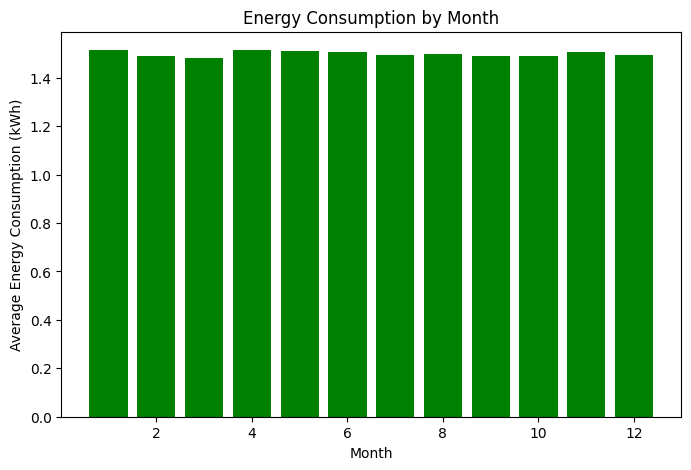

In [ ]:
monthly_consumption = dataset.groupby('Month')['Energy Consumption (kWh)'].mean()

plt.figure(figsize=(8,5))
plt.bar(monthly_consumption.index, monthly_consumption.values, color='green')
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Energy Consumption by Month")
plt.show()

In [ ]:
dataset.describe()

,Home ID,Appliance Type,Energy Consumption (kWh),Outdoor Temperature (°C),Season,Household Size,Year,Month,Day,Weekday,Is_Weekend,Hour,Time_of_Day
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,4.490760,1.499952,14.950135,1.497320,3.001770,2023.002820,6.494090,15.674070,3.009970,1.734300,11.486460,1.755210
std,144.435367,2.869752,1.181176,14.438755,1.117338,1.417077,0.053029,3.449386,8.791428,2.007837,2.719941,6.925759,1.126757
min,1.000000,0.000000,0.100000,-10.000000,0.000000,1.000000,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,2.000000,0.590000,2.400000,0.000000,2.000000,2023.000000,4.000000,8.000000,1.000000,0.000000,5.000000,1.000000
50%,250.000000,4.000000,1.230000,14.900000,1.000000,3.000000,2023.000000,6.000000,16.000000,3.000000,0.000000,11.000000,2.000000
75%,375.000000,7.000000,1.870000,27.400000,2.000000,4.000000,2023.000000,10.000000,23.000000,5.000000,6.000000,18.000000,3.000000
max,500.000000,9.000000,5.000000,40.000000,3.000000,5.000000,2024.000000,12.000000,31.000000,6.000000,6.000000,23.000000,3.000000


In [ ]:
dataset['Monthly_Avg_Consumption'] = dataset.groupby(['Year', 'Month'])['Energy Consumption (kWh)'].transform('mean')


In [ ]:
dataset.drop(['Year','Month'],axis='columns',inplace=True)

In [ ]:
dataset.columns

Index(['Home ID', 'Appliance Type', 'Energy Consumption (kWh)',
       'Outdoor Temperature (°C)', 'Season', 'Household Size', 'Day',
       'Weekday', 'Is_Weekend', 'Hour', 'Time_of_Day',
       'Monthly_Avg_Consumption'],
      dtype='object')

In [ ]:
dataset.describe()

,Home ID,Appliance Type,Energy Consumption (kWh),Outdoor Temperature (°C),Season,Household Size,Day,Weekday,Is_Weekend,Hour,Time_of_Day,Monthly_Avg_Consumption
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,4.490760,1.499952,14.950135,1.497320,3.001770,15.674070,3.009970,1.734300,11.486460,1.755210,1.499952
std,144.435367,2.869752,1.181176,14.438755,1.117338,1.417077,8.791428,2.007837,2.719941,6.925759,1.126757,0.011258
min,1.000000,0.000000,0.100000,-10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.415674
25%,125.000000,2.000000,0.590000,2.400000,0.000000,2.000000,8.000000,1.000000,0.000000,5.000000,1.000000,1.491571
50%,250.000000,4.000000,1.230000,14.900000,1.000000,3.000000,16.000000,3.000000,0.000000,11.000000,2.000000,1.500065
75%,375.000000,7.000000,1.870000,27.400000,2.000000,4.000000,23.000000,5.000000,6.000000,18.000000,3.000000,1.511567
max,500.000000,9.000000,5.000000,40.000000,3.000000,5.000000,31.000000,6.000000,6.000000,23.000000,3.000000,1.516208


WEEKDAY VS WEEKEND

In [ ]:
energy_weekday=dataset.groupby('Weekday')['Energy Consumption (kWh)'].mean()
energy_weekend=dataset.groupby('Is_Weekend')['Energy Consumption (kWh)'].mean()

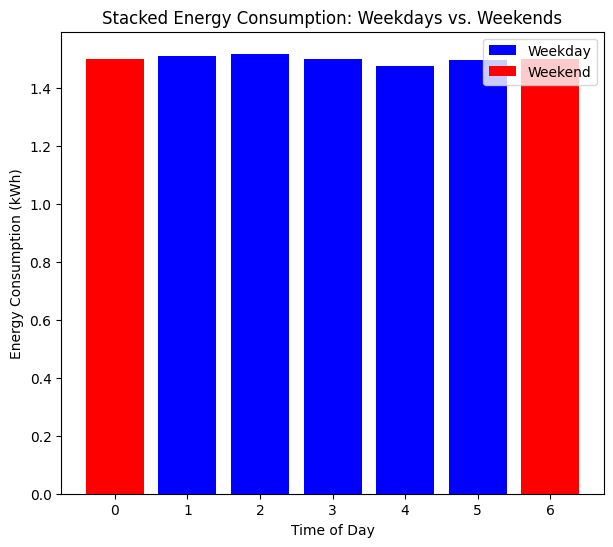

In [ ]:
plt.figure(figsize=(7, 6))
plt.bar(energy_weekday.index, energy_weekday.values, color='blue', label="Weekday")
plt.bar(energy_weekend.index, energy_weekend.values, color='red', label="Weekend")

plt.xlabel("Time of Day")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.title("Stacked Energy Consumption: Weekdays vs. Weekends")
plt.show()


In [ ]:
dataset.groupby(dataset['Is_Weekend'])['Energy Consumption (kWh)'].mean()


Is_Weekend
0    1.500559
6    1.498457
Name: Energy Consumption (kWh), dtype: float64

In [ ]:
dataset.groupby(dataset['Weekday'])['Energy Consumption (kWh)'].mean()


Weekday
0    1.497612
1    1.509257
2    1.518348
3    1.500960
4    1.476805
5    1.497264
6    1.499625
Name: Energy Consumption (kWh), dtype: float64

In [ ]:
dataset.groupby(dataset['Household Size'])['Energy Consumption (kWh)'].sum()

Household Size
1    30417.02
2    29796.97
3    29826.30
4    30101.45
5    29853.42
Name: Energy Consumption (kWh), dtype: float64

In [ ]:
dataset['Household Size'].value_counts()

Household Size
1    20175
5    20099
4    20021
3    20013
2    19692
Name: count, dtype: int64

Now we want to make a cluster  of households

In [ ]:
dict={
    "Energy_Consumption":dataset['Energy Consumption (kWh)'].values,
    "Household_Size":dataset['Household Size']
}

In [ ]:
dataset_houshold=pd.DataFrame(dict)

In [ ]:
dataset_houshold.isnull().sum()

Energy_Consumption    0
Household_Size        0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st_house=StandardScaler()
st_energy=StandardScaler()

In [ ]:
dataset_houshold['Household_Size']=st_house.fit_transform(dataset_houshold['Household_Size'].values.reshape(-1,1))
dataset_houshold['Energy_Consumption']=st_energy.fit_transform(dataset_houshold['Energy_Consumption'].values.reshape(-1,1))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# loss=[]
# for k in range(1,10):
#     ke=KMeans(n_clusters=k)
#     ke.fit_transform(dataset_houshold[['Household_Size','Energy_Consumption']])
#     loss.append(ke.inertia_)

In [ ]:
# loss

In [ ]:
# k_range=range(1,10)
# plt.plot(k_range,loss)

In [ ]:
# from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
X=dataset_houshold.values

In [ ]:
km=KMeans(n_clusters=4)

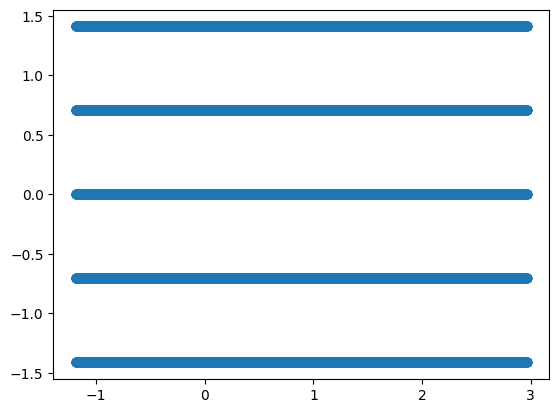

In [ ]:
plt.scatter(dataset_houshold['Energy_Consumption'],dataset_houshold['Household_Size'])

In [ ]:
dataset_houshold['Household_Size']=st_house.inverse_transform(dataset_houshold['Household_Size'].values.reshape(-1,1))
dataset_houshold['Energy_Consumption']=st_energy.inverse_transform(dataset_houshold['Energy_Consumption'].values.reshape(-1,1))

In [ ]:
dataset_houshold

,Energy_Consumption,Household_Size
0,0.20,2.0
1,0.23,5.0
2,0.32,3.0
3,3.92,1.0
4,0.44,5.0
...,...,...
99995,0.42,1.0
99996,0.71,2.0
99997,0.25,3.0
99998,2.69,1.0


In [ ]:
km=KMeans(n_clusters=4)
y_pred=km.fit_predict(dataset_houshold)

In [ ]:
y_pred

array([3, 1, 0, ..., 0, 3, 1])

In [ ]:
dataset_houshold["cluster"]=y_pred

In [ ]:
dataset_houshold

,Energy_Consumption,Household_Size,cluster
0,0.20,2.0,3
1,0.23,5.0,1
2,0.32,3.0,0
3,3.92,1.0,2
4,0.44,5.0,1
...,...,...,...
99995,0.42,1.0,3
99996,0.71,2.0,3
99997,0.25,3.0,0
99998,2.69,1.0,3


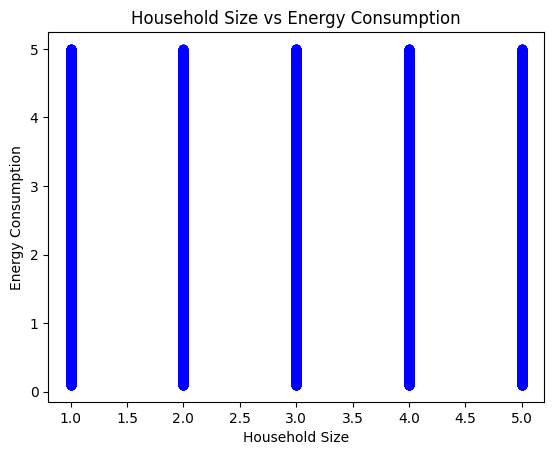

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(dataset_houshold['Household_Size'], dataset_houshold['Energy_Consumption'], alpha=0.7, color='b')

# Labels and title
plt.xlabel('Household Size')
plt.ylabel('Energy Consumption')
plt.title('Household Size vs Energy Consumption')

# Show the plot
plt.show()


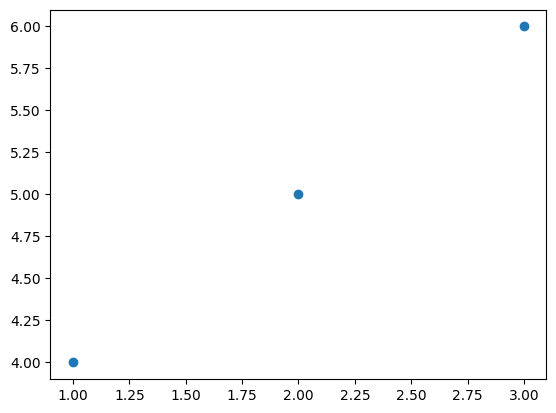

In [ ]:
plt.scatter([1, 2, 3], [4, 5, 6])
plt.show()


In [ ]:
dataset_houshold1=dataset_houshold[dataset_houshold['cluster']==0]
dataset_houshold2=dataset_houshold[dataset_houshold['cluster']==1]
dataset_houshold3=dataset_houshold[dataset_houshold['cluster']==2]
dataset_houshold4=dataset_houshold[dataset_houshold['cluster']==3]


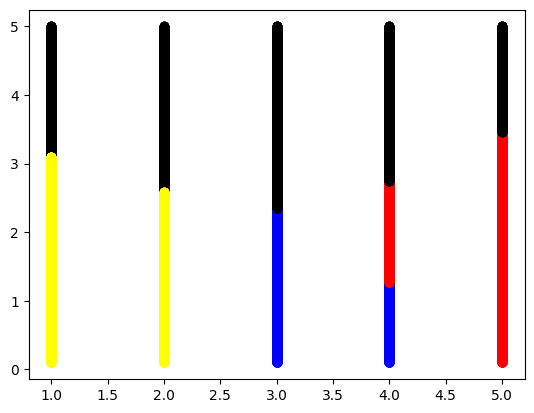

In [ ]:
plt.scatter(dataset_houshold1['Household_Size'],dataset_houshold1['Energy_Consumption'], alpha=0.7, color='b')
plt.scatter(dataset_houshold2['Household_Size'],dataset_houshold2['Energy_Consumption'], alpha=0.7, color='r')
plt.scatter(dataset_houshold3['Household_Size'],dataset_houshold3['Energy_Consumption'], alpha=0.7, color='black')
plt.scatter(dataset_houshold4['Household_Size'],dataset_houshold4['Energy_Consumption'], alpha=0.7, color='yellow')

In [ ]:
dataset_houshold['Energy_Consumption']=st_house.fit_transform(dataset_houshold['Energy_Consumption'].values.reshape(-1,1))
dataset_houshold['Household_Size']=st_house.fit_transform(dataset_houshold['Household_Size'].values.reshape(-1,1))

In [ ]:
dataset_houshold1=dataset_houshold[dataset_houshold['cluster']==0]
dataset_houshold2=dataset_houshold[dataset_houshold['cluster']==1]
dataset_houshold3=dataset_houshold[dataset_houshold['cluster']==2]
dataset_houshold4=dataset_houshold[dataset_houshold['cluster']==3]


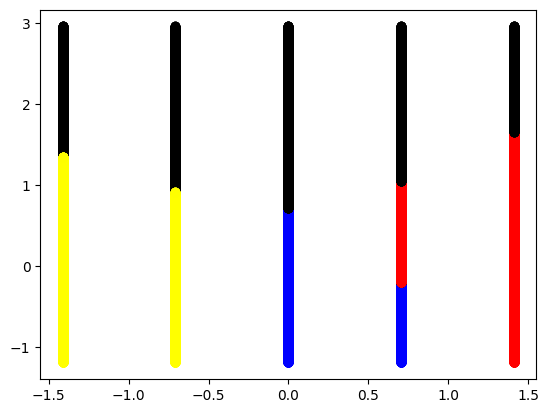

In [ ]:
plt.scatter(dataset_houshold1['Household_Size'],dataset_houshold1['Energy_Consumption'], alpha=0.7, color='b')
plt.scatter(dataset_houshold2['Household_Size'],dataset_houshold2['Energy_Consumption'], alpha=0.7, color='r')
plt.scatter(dataset_houshold3['Household_Size'],dataset_houshold3['Energy_Consumption'], alpha=0.7, color='black')
plt.scatter(dataset_houshold4['Household_Size'],dataset_houshold4['Energy_Consumption'], alpha=0.7, color='yellow')


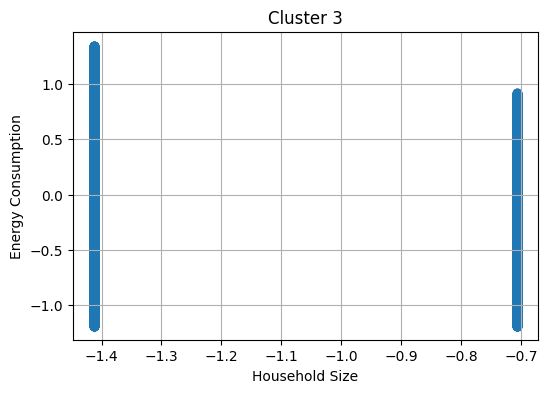

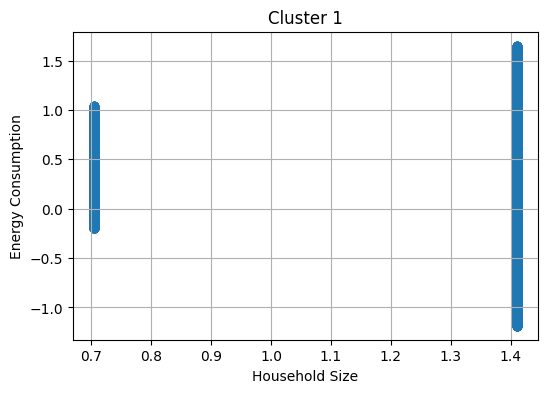

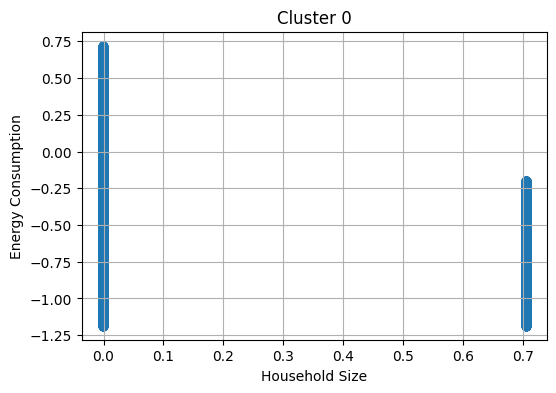

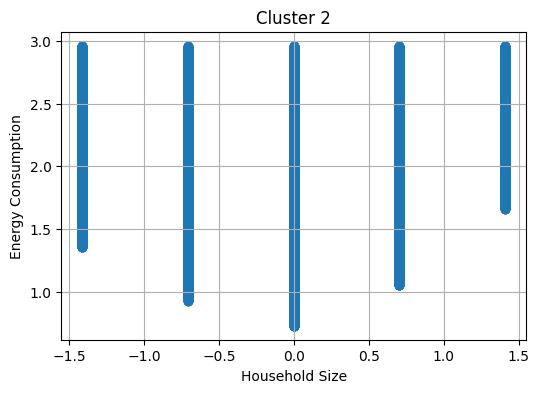

In [ ]:
import matplotlib.pyplot as plt

# Get unique clusters
unique_clusters = dataset_houshold['cluster'].unique()

# Plot each cluster separately
for cluster in unique_clusters:
    cluster_data = dataset_houshold[dataset_houshold['cluster'] == cluster]  # Filter data for cluster
    plt.figure(figsize=(6,4))  # Create a new figure for each cluster
    plt.scatter(cluster_data['Household_Size'], cluster_data['Energy_Consumption'], alpha=0.5)
    plt.xlabel('Household Size')
    plt.ylabel('Energy Consumption')
    plt.title(f'Cluster {cluster}')
    plt.grid(True)
    plt.show()

In [ ]:
cm=KMeans(n_clusters=3)

In [ ]:
dataset_houshold.drop(['cluster'],axis='columns',inplace=True)

In [ ]:
y_pred=cm.fit_predict(dataset_houshold)

In [ ]:
y_pred

array([1, 2, 2, ..., 2, 1, 2])

In [ ]:
dataset_houshold['cluster']=y_pred

In [ ]:
dataset_houshold1=dataset_houshold[dataset_houshold['cluster']==0]
dataset_houshold2=dataset_houshold[dataset_houshold['cluster']==1]
dataset_houshold3=dataset_houshold[dataset_houshold['cluster']==2]



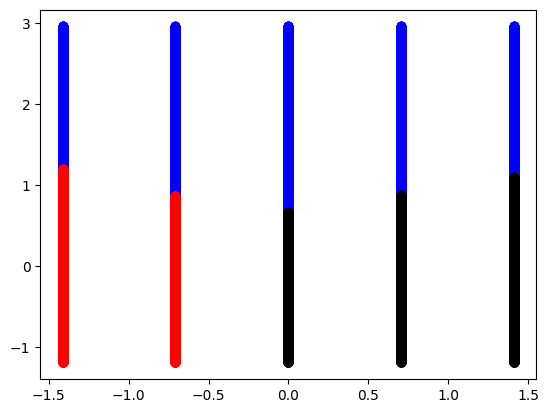

In [ ]:
plt.scatter(dataset_houshold1['Household_Size'],dataset_houshold1['Energy_Consumption'], alpha=0.7, color='b')
plt.scatter(dataset_houshold2['Household_Size'],dataset_houshold2['Energy_Consumption'], alpha=0.7, color='r')
plt.scatter(dataset_houshold3['Household_Size'],dataset_houshold3['Energy_Consumption'], alpha=0.7, color='black')

In [ ]:
unique_clusters=dataset_houshold['cluster'].unique()

In [ ]:
unique_clusters

array([1, 2, 0])

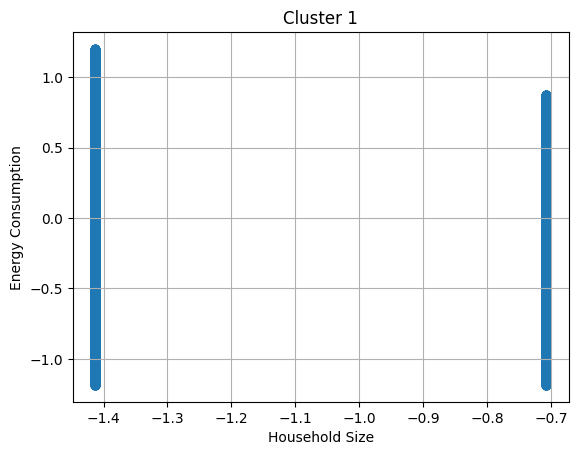

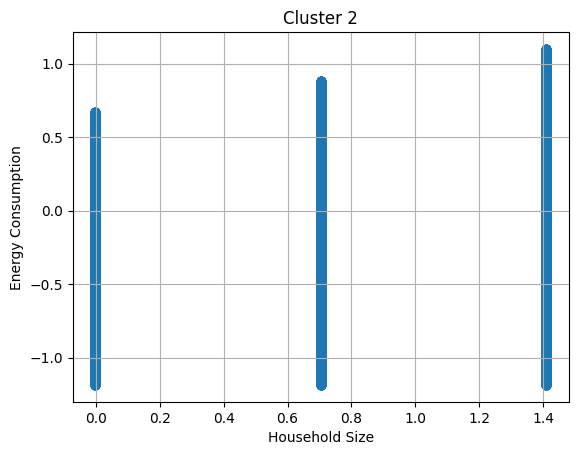

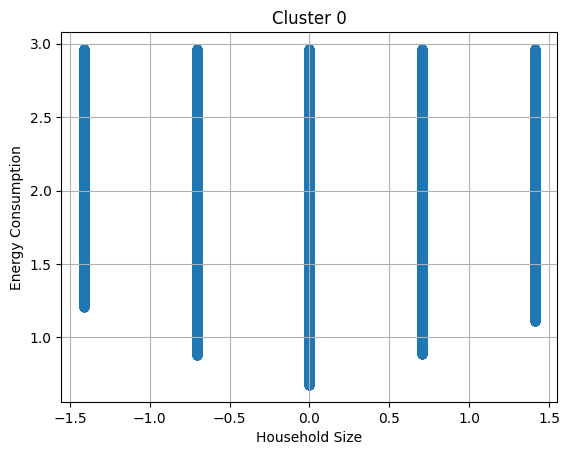

In [ ]:
for cluster in unique_clusters:
    cluster_data=dataset_houshold[dataset_houshold['cluster']==cluster]
    plt.Figure(figsize=(8,6))
    plt.scatter(cluster_data['Household_Size'],cluster_data['Energy_Consumption'])
    plt.xlabel('Household Size')
    plt.ylabel('Energy Consumption')
    plt.title(f'Cluster {cluster}')
    plt.grid(True)
    plt.show()


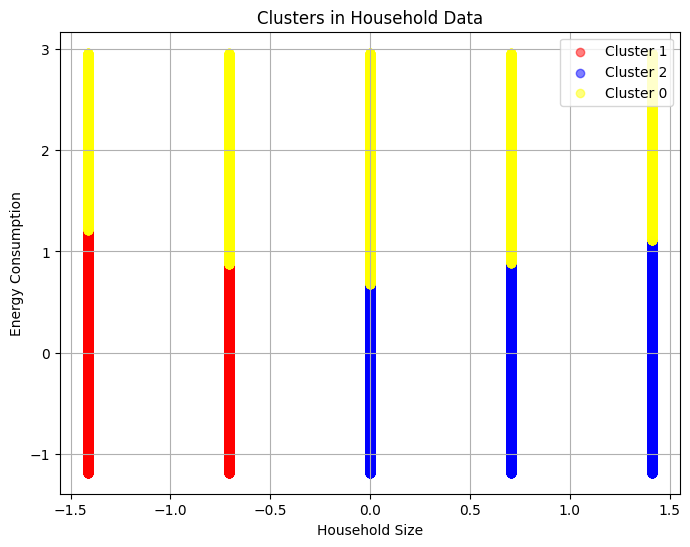

In [ ]:
import matplotlib.pyplot as plt

# Define colors for clusters
colors = ['red', 'blue', 'yellow', 'black', 'green']  # Adjust based on the number of clusters

plt.figure(figsize=(8,6))
for i, cluster in enumerate(dataset_houshold['cluster'].unique()):
    cluster_data = dataset_houshold[dataset_houshold['cluster'] == cluster]
    plt.scatter(cluster_data['Household_Size'], cluster_data['Energy_Consumption'], 
                alpha=0.5, label=f'Cluster {cluster}', color=colors[i % len(colors)])

plt.xlabel('Household Size')
plt.ylabel('Energy Consumption')
plt.title('Clusters in Household Data')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
dataset_sample=dataset_houshold.sample(1000)

In [ ]:
dataset_sample1=dataset_sample[dataset_sample['cluster']==0]
dataset_sample2=dataset_sample[dataset_sample['cluster']==1]
dataset_sample3=dataset_sample[dataset_sample['cluster']==2]



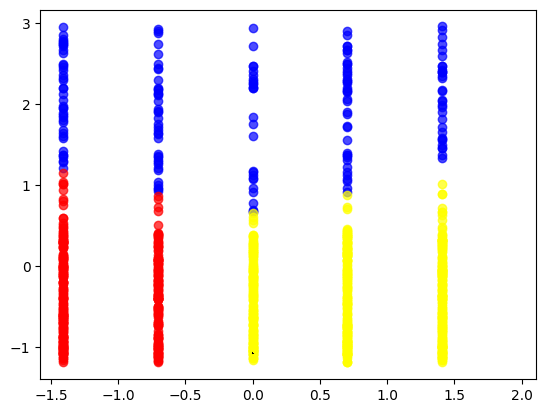

In [ ]:
plt.scatter(dataset_sample1['Household_Size'],dataset_sample1['Energy_Consumption'], alpha=0.7, color='b')
plt.scatter(dataset_sample2['Household_Size'],dataset_sample2['Energy_Consumption'], alpha=0.7, color='r')
plt.scatter(dataset_sample3['Household_Size'],dataset_sample3['Energy_Consumption'], alpha=0.7, color='yellow')
plt.scatter(cm.cluster_centers_[0,:],cm.cluster_centers_[1,:],cm.cluster_centers_[2,:],color='black',marker='+',label='centoid')

In [ ]:
cm.cluster_centers_

array([[ 1.94091312e+00,  1.40904476e-03],
       [-3.54217343e-01, -1.07041019e+00],
       [-3.76795979e-01,  7.15555278e-01]])

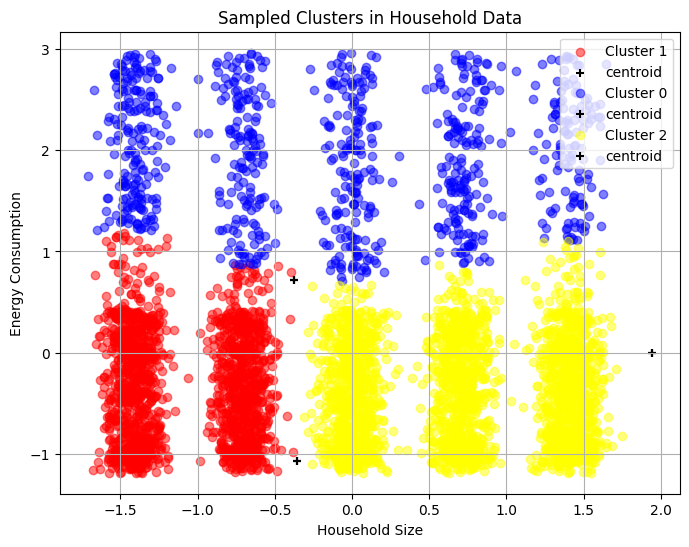

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample only 5000 points from the dataset for visualization
sample_size = 5000  # Adjust as needed
sampled_data = dataset_houshold.sample(n=sample_size, random_state=42)  

# Define colors for clusters
colors = ['red', 'blue', 'yellow', 'black', 'green']

plt.figure(figsize=(8,6))
for i, cluster in enumerate(sampled_data['cluster'].unique()):
    cluster_data = sampled_data[sampled_data['cluster'] == cluster]

    # Adding jitter to reduce overlapping
    jitter_x = np.random.normal(0, 0.1, size=len(cluster_data))

    plt.scatter(cluster_data['Household_Size'] + jitter_x, cluster_data['Energy_Consumption'], 
                alpha=0.5, label=f'Cluster {cluster}', color=colors[i % len(colors)])
    plt.scatter(cm.cluster_centers_[:,0],cm.cluster_centers_[:,1],color='black',marker='+',label='centroid')
plt.xlabel('Household Size')
plt.ylabel('Energy Consumption')
plt.title('Sampled Clusters in Household Data')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
dataset_houshold

,Energy_Consumption,Household_Size,cluster
0,-1.100563,-0.706931,1
1,-1.075164,1.410114,2
2,-0.998969,-0.001249,2
3,2.048857,-1.412612,0
4,-0.897374,1.410114,2
...,...,...,...
99995,-0.914307,-1.412612,1
99996,-0.668787,-0.706931,1
99997,-1.058232,-0.001249,2
99998,1.007517,-1.412612,1


In [ ]:
dataset_houshold['cluster'].value_counts()

cluster
2    50375
1    33696
0    15929
Name: count, dtype: int64

In [ ]:
features=["Energy Consumption (kWh)", "Hour", "Weekday", "Outdoor Temperature (°C)"]

In [ ]:
X=dataset[features]

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dataset["cluster"] = kmeans.fit_predict(X_scaled)

# Map clusters to user-friendly labels
dataset["consumption_category"] =dataset["cluster"].map({0: "Low", 1: "Medium", 2: "High"})

# Display sample data
print(dataset[["Home ID", "consumption_category"]].head())


   Home ID consumption_category
0       94               Medium
1      435               Medium
2      466                 High
3      496                  Low
4      137               Medium


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  int32  
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Outdoor Temperature (°C)  100000 non-null  float64
 4   Season                    100000 non-null  int32  
 5   Household Size            100000 non-null  int64  
 6   Day                       100000 non-null  int32  
 7   Weekday                   100000 non-null  int32  
 8   Is_Weekend                100000 non-null  int64  
 9   Hour                      100000 non-null  int32  
 10  Time_of_Day               100000 non-null  int32  
 11  Monthly_Avg_Consumption   100000 non-null  float64
 12  cluster                   100000 non-null  int32  
 13  consumption_category      100000 non-null  ob

In [ ]:
def recommend_energy_saving(user_id):
    user_data=dataset[dataset['Home ID']==user_id]
    if user_data.empty:
        return ["⚠️ Household ID not found."]
    category=user_data['consumption_category'].iloc[0]
    if category == "High":
        recommendations.append("⚡ Reduce peak hour usage (6-9 PM).")
        recommendations.append("🔄 Use energy-efficient appliances.")
        recommendations.append("🌞 Consider solar panel installation.")
    
    elif category == "Medium":
        recommendations.append("🔄 Optimize heavy appliance usage.")
        recommendations.append("⏳ Run appliances at off-peak hours.")
    
    else:
        recommendations.append("✅ You have efficient energy usage. Keep it up!")
    
    return recommendations

# Example: Get recommendations for a specific household
household_id = 1234  # Replace with actual household ID
recommendations = recommend_energy_saving(household_id)
print(f"Recommendations for Household {household_id}:")
for rec in recommendations:
    print("✔️", rec)


Recommendations for Household 1234:
✔️ ⚠️ Household ID not found.


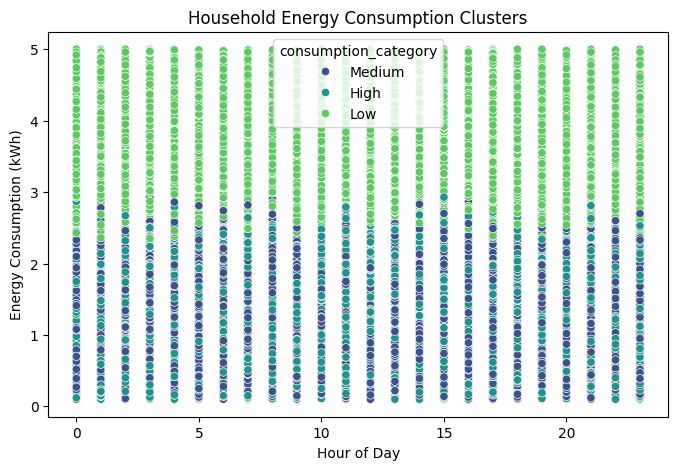

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dataset["Hour"], y=dataset["Energy Consumption (kWh)"], hue=dataset["consumption_category"], palette="viridis")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Household Energy Consumption Clusters")
plt.show()


In [ ]:
import pickle

In [ ]:
with open("smart_home_energy_consumption_large.pkl",'wb') as file:
    pickle.dump(dataset,file)

In [ ]:
dataset

,Home ID,Appliance Type,Energy Consumption (kWh),Outdoor Temperature (°C),Season,Household Size,Day,Weekday,Is_Weekend,Hour,Time_of_Day,Monthly_Avg_Consumption,cluster,consumption_category
0,94,3,0.20,-1.0,0,2,2,5,6,21,3,1.494715,1,Medium
1,435,7,0.23,31.1,2,5,6,6,6,20,1,1.500065,1,Medium
2,466,2,0.32,21.3,0,3,21,1,0,6,2,1.506736,2,High
3,496,4,3.92,-4.2,3,1,21,5,6,21,3,1.516208,0,Low
4,137,6,0.44,34.5,2,5,26,5,6,4,3,1.500065,1,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124,6,0.42,20.5,2,1,28,3,0,9,2,1.489485,1,Medium
99996,184,1,0.71,-5.4,1,2,27,5,6,12,0,1.511567,1,Medium
99997,101,2,0.25,35.6,3,3,18,5,6,5,2,1.490529,1,Medium
99998,423,0,2.69,3.7,1,1,20,3,0,12,0,1.514678,0,Low
